In [3]:
import sys;
import select;
import socket;
import time;
import os;
import numpy as np
import random;
import ctypes;
from time import sleep;
import time; 
import matplotlib.pyplot as plt 
%matplotlib inline
import struct
import numpy as np
import glob

In [8]:
names = glob.glob('100*.npz')
names

['100Mhz_2048b.npz', '100Mhz_256b.npz', '100Mhz_4096b.npz', '100Mhz_1024b.npz']

Filename: 100Mhz_2048b.npz
Duration 0.20376133918762207
53.92 MB/s
Filename: 100Mhz_256b.npz
Duration 0.19603633880615234
19.92 MB/s
Filename: 100Mhz_4096b.npz
Duration 0.21449017524719238
36.42 MB/s
Filename: 100Mhz_1024b.npz
Duration 0.2611103057861328
29.92 MB/s


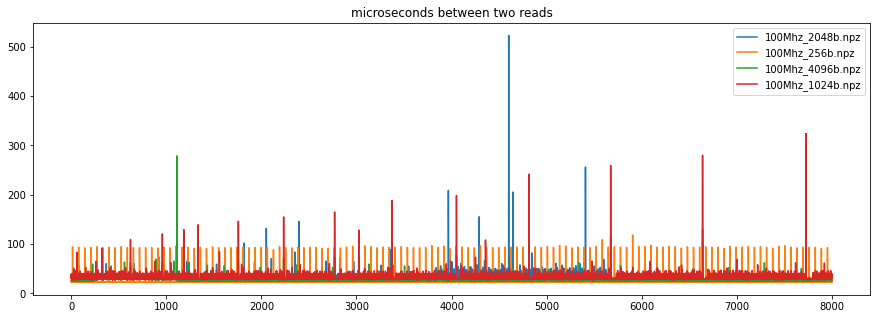

In [60]:
plt.figure(figsize=(15,5))
for filename in names:
    DATA = np.array(np.load(filename)["data"])
    timings = np.array(np.load(filename)["t"])
    lengths = [len(x) for x in DATA]
    mAx = np.argmax(np.array(lengths) < 1 )
    if mAx == 0:
        mAx = len(DATA)-1
    times = [(timings[x+1]-timings[x]) for x in range(len(DATA)-1)]
    mIn = mAx//5
    plt.plot([x*1000000 for x in times[mIn:mAx]],label=filename)
    print("Filename:",filename)
    Duration = timings[mAx]-timings[mIn]
    print("Duration",Duration)
    Bytes = len(DATA[mIn:mAx])*len(DATA[mIn])
    print(int((Bytes/Duration)/(1024*1024)*100)/100,"MB/s")
plt.title("microseconds between two reads")
plt.legend()

In [49]:
8000*1024//2,"samples"

(4096000, 'samples')

In [50]:
4096000/66,"us"

(62060.606060606064, 'us')

In [58]:
DATA[mIn+7]

b";\xff;\xff%\xff%\xff'\xff'\xff-\xff-\xff/\xff/\xff5\xff5\xff7\xff7\xff=\xff=\xff?\xff?\xffA\xffA\xffC\xffC\xffI\xffI\xffK\xffK\xffQ\xffQ\xffS\xffS\xffY\xffY\xff[\xff[\xffE\xffE\xffG\xffG\xffM\xffM\xffO\xffO\xffU\xffU\xffW\xffW\xff]\xff]\xff_\xff_\xffa\xffa\xffc\xffc\xffi\xffi\xffk\xffk\xffq\xffq\xffs\xffs\xffy\xffy\xff{\xff{\xffe\xffe\xffg\xffg\xffm\xffm\xffo\xffo\xffu\xffu\xffw\xffw\xff}\xff}\xff\x7f\xff\x7f\xff\x81\xff\x81\xff\x83\xff\x83\xff\x89\xff\x89\xff\x8b\xff\x8b\xff\x91\xff\x91\xff\x93\xff\x93\xff\x99\xff\x99\xff\x9b\xff\x9b\xff\x85\xff\x85\xff\x87\xff\x87\xff\x8d\xff\x8d\xff\x8f\xff\x8f\xff\x95\xff\x95\xff\x97\xff\x97\xff\x9d\xff\x9d\xff\x9f\xff\x9f\xff\xa1\xff\xa1\xff\xa3\xff\xa3\xff\xa9\xff\xa9\xff\xab\xff\xab\xff\xb1\xff\xb1\xff\xb3\xff\xb3\xff\xb9\xff\xb9\xff\xbb\xff\xbb\xff\xa5\xff\xa5\xff\xa7\xff\xa7\xff\xad\xff\xad\xff\xaf\xff\xaf\xff\xb5\xff\xb5\xff\xb7\xff\xb7\xff\xbd\xff\xbd\xff\xbf\xff\xbf\xff\xc1\xff\xc1\xff\xc3\xff\xc3\xff\xc9\xff\xc9\xff\xcb\xff\xcb\xff\xd1\x